In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
df = pd.read_csv('train_lr_1_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7789 non-null   int64  
 1   DistrictId     7789 non-null   int64  
 2   Rooms          7789 non-null   float64
 3   Square         7789 non-null   float64
 4   LifeSquare     7789 non-null   float64
 5   KitchenSquare  7789 non-null   float64
 6   Floor          7789 non-null   int64  
 7   HouseFloor     7789 non-null   float64
 8   HouseYear      7789 non-null   int64  
 9   Ecology_1      7789 non-null   float64
 10  Social_1       7789 non-null   int64  
 11  Social_3       7789 non-null   int64  
 12  Healthcare_1   7789 non-null   float64
 13  Helthcare_2    7789 non-null   int64  
 14  Shops_1        7789 non-null   int64  
 15  Price          7789 non-null   float64
 16  Ecology_2_B    7789 non-null   bool   
 17  Ecology_3_B    7789 non-null   bool   
 18  Shops_2_

In [3]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_B', 'Ecology_3_B', 'Shops_2_B']
target_name = 'Price'
df = df[feature_names + [target_name]]
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_B,Ecology_3_B,Shops_2_B,Price
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,11,0,900.0,0,0,True,True,True,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,1,1183.0,1,0,True,True,True,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,0,240.0,3,1,True,True,True,282078.720850
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,1,0,900.0,0,1,True,True,True,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,2,900.0,0,6,True,True,True,343995.102962


In [4]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])


In [5]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [6]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecology_2_B      0
Ecology_3_B      0
Shops_2_B        0
Price            0
dtype: int64

In [7]:
X = df[feature_names]
y = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)
y_test.isna().sum()

np.int64(0)

In [8]:
def evaluate_preds(true_values, pred_values, save=False):

    fig, ax = plt.subplots()
    textstr = ("R2:  " + str(round(r2(true_values, pred_values), 3)))
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)    
    sns.scatterplot(x=pred_values, y=true_values)
    ax.plot([59000, 600000], [59000, 600000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

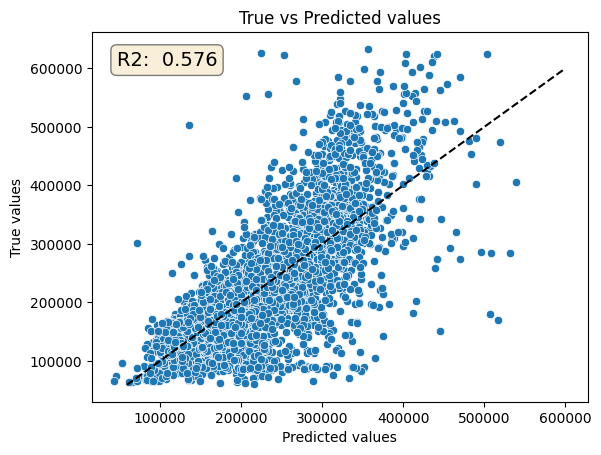

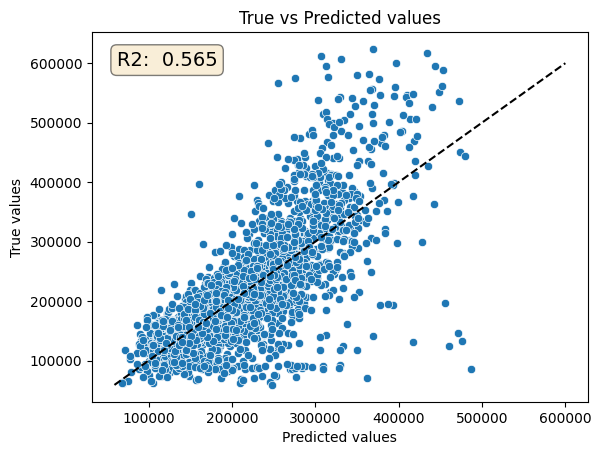

In [10]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)


In [11]:
dt_model = DecisionTreeRegressor(criterion='squared_error',
                                 max_depth=10,
                                 min_samples_leaf=30, 
                                 random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=30, random_state=42)

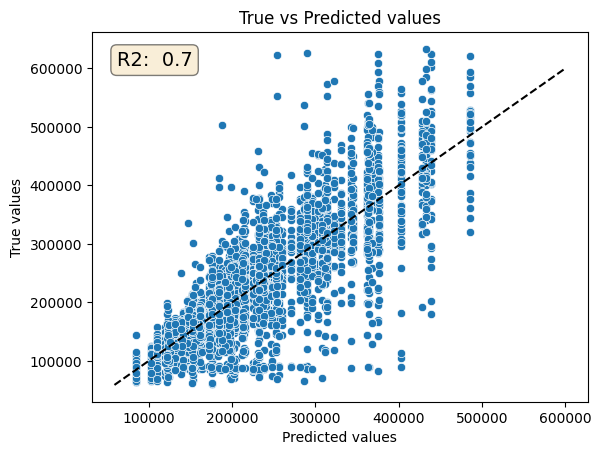

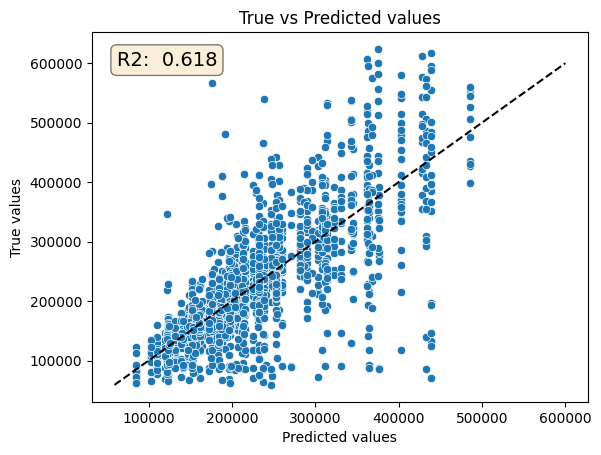

In [12]:
y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)


In [13]:
rf_model = RandomForestRegressor(criterion='squared_error',
                                 max_depth=20, 
                                 min_samples_leaf=30,
                                 random_state=42,
                                 n_estimators=50
                                 )
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=30, n_estimators=50,
                      random_state=42)

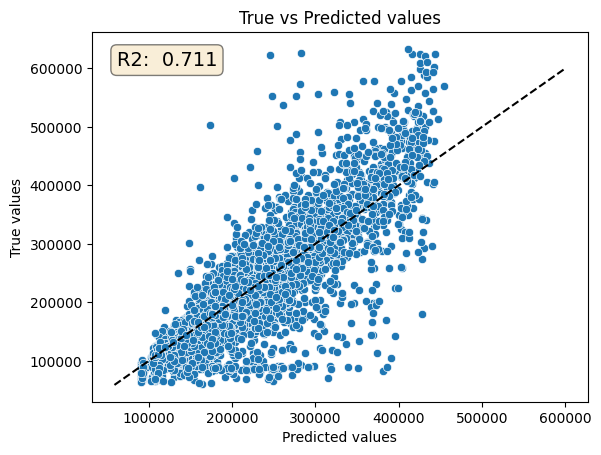

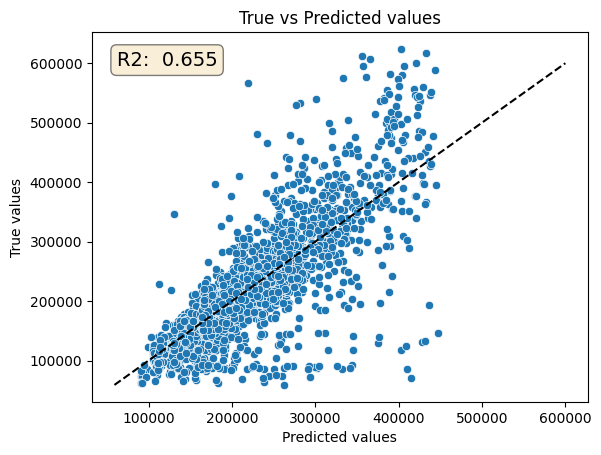

In [14]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)


In [15]:
gb_model = GradientBoostingRegressor(criterion='squared_error',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=7,
                          min_samples_leaf=10, random_state=42)

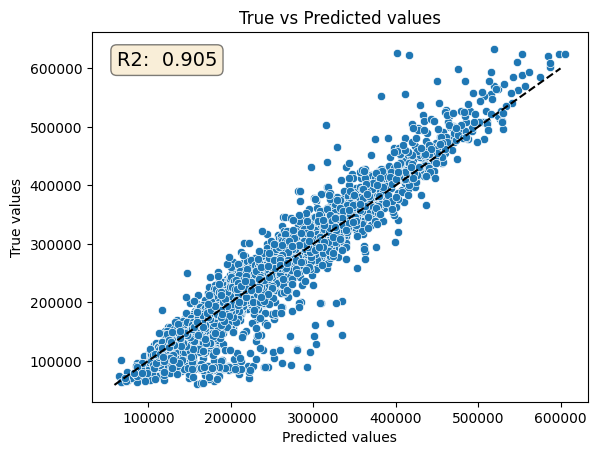

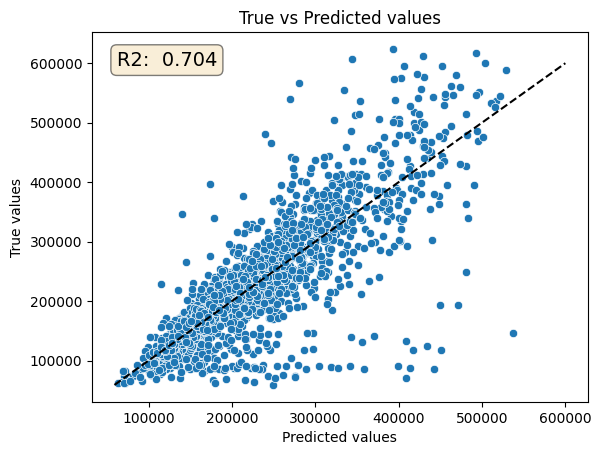

In [16]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)


In [17]:
params = {'n_estimators': [50, 100, 200, 400],
          'max_depth': [3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params,
                  scoring= 'r2', # метрика
                  cv=KFold(n_splits=5,   
    			  random_state=21,
                  shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_test, y_test)

GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 max_depth=7,
                                                 min_samples_leaf=10,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [18]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [19]:
df_1 = pd.read_csv('test_lr_1_processed.csv')


In [20]:
gb_model = GradientBoostingRegressor(criterion='squared_error',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     random_state=42,
                                     n_estimators=100)
gb_model.fit(X_test, y_test)

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          min_samples_leaf=10, random_state=42)

In [21]:
y_train_preds = gb_model.predict(df_1)

In [22]:
y_train_preds

array([384663.48991423, 359938.98638305, 384663.48991423, ...,
       379247.05356797, 433570.6315835 , 426555.56150811])

In [23]:
len(y_train_preds)

5000

In [24]:
def save_object_to_csv(obj, filename):
    """
    Сохраняет объект (например, numpy.ndarray, DataFrame или Series) в CSV файл.
    
    :param obj: Объект для сохранения (может быть numpy.ndarray, DataFrame или Series).
    :param filename: Имя файла, в который будет сохранен объект (без расширения).
    """
    # Преобразуем объект в Series, если это numpy.ndarray
    if isinstance(obj, np.ndarray):
        obj = pd.Series(obj)
    
    # Сохраняем в CSV
    obj.to_csv(f"{filename}.csv", index=False)
    print(f"Объект успешно сохранен в {filename}.csv")

# Пример использования:
save_object_to_csv(y_train_preds, 'Предикты для 2й лабы')

Объект успешно сохранен в Предикты для 2й лабы.csv
